In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Scikit Classification Review

An overview of classification methods via scikit-learn. This notebook is a "quick" review of classification techniques, with some simplified tuning, feature selection, and EDA (exploratory data analysis).

<b>By no means</b> will this notebook consider <i>all</i> classification methods or techniques, nor will it consider <i>all</i> the possible edge cases or issues that may arise (they are many), but will serve as a broad overview with some simpler optimization steps.  I may reference areas for further consideration below.

### Objective

This notebook will attempt to accurately predict the target class in the data described below.  Specifically, whether or not the mushrooms observed in the data are poisonous or not.

### Methods

I will follow these high-level steps below:

1. <a href="#extract"> Extract Data </a>
2. <a href="#summarize">Data Summarization </a>
3. <a href="#processing"> Data Processing </a>
4. <a href="#tuning">Model Tuning </a>
5. <a href="#brief">Brief Explanations of Algorithms</a>
6. <a href="#fit">Fit Models &amp; Make Predictions</a>
7. <a href="#evaluate">Evaluate Models </a>

Afterwards, I will draw some conclusions and make <a href="#final">final remarks</a>.

### Data Source

My dataset, The UCI Mushroom Data Set, comes from the UCI repository (by way of Kaggle) at <a href="https://www.kaggle.com/uciml/mushroom-classification">this link</a>.  
The original dataset can be found at https://archive.ics.uci.edu/ml/datasets/mushroom as well.

Some dataset info from UCI:

<h4>Data Set Information:</h4>

<p>This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.</p>


<h4>Attribute Information:</h4>

<ol>
<li> cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s </li>
<li> cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s </li>
<li> cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y </li>
<li> bruises?: bruises=t,no=f </li>
<li> odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s </li>
<li> gill-attachment: attached=a,descending=d,free=f,notched=n </li>
<li> gill-spacing: close=c,crowded=w,distant=d </li>
<li> gill-size: broad=b,narrow=n </li>
<li> gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y </li>
<li> stalk-shape: enlarging=e,tapering=t </li>
<li> stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? </li>
<li> stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s </li>
<li> stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s </li>
<li> stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y </li>
<li> stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y </li>
<li> veil-type: partial=p,universal=u </li>
<li> veil-color: brown=n,orange=o,white=w,yellow=y </li>
<li> ring-number: none=n,one=o,two=t </li>
<li> ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z </li>
<li> spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y </li>
<li> population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y </li>
<li> habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d</li>

In [2]:
#A notebook to review the main classification algos and the process for building a good classifier with scikit
#explain the data source and the goal, build a basic pipeline, do basic data cleaning and EDA
#create text to explain all this
#some notes taken from https://www.kaggle.com/jeffd23/10-classifier-showdown-in-scikit-learn

In [3]:
#import libraries

#basic libraries always needed
import numpy as np
import pandas as pd
from IPython.display import display, HTML

#some data processing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#get all the classifier algos, explain all of them
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.naive_bayes import GaussianNB
#ensemble methods
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

import re

#may also use k-folds for tuning...

#libraries to evaluate the models
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, f1_score, auc, roc_curve, roc_auc_score

#k-folds version of results, show how model selection works

C:\Users\tnelson\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Extract Data <a id="extract"></a>

In [4]:
#EXTRACT or load data
#explain the variables and the target variable
df = pd.read_csv('data/mushrooms.csv') #mushroom attributes and if they are poisonous or not

In [5]:
#quick attributes of the dataset
display(HTML("<h3>Data Summarization:</h3><br><a id='summarize'></a>"))
print("(rows,columns) "+str(df.shape)+"\n")
display(HTML("<p>Quick peek at the data, described:</p>"))
display(df.describe())
print("\n")
display(HTML("<p>Quick peek at the raw data:</p>"))
df.head(5)

(rows,columns) (8124, 23)



,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Above, 'class' is our target variable, with values of 'p' or 'e' indicating poisonous or edible, respectively.  We see that our dataset is pretty well balanced between these two classes, this is pretty rare, typically we would deal with some amount of class imbalance and have to take corrective measures, which is a topic for another notebook.

Although we cannot see all the columns above, it looks like all of our independent variables, or predictor variables, are categorical, which already indicates some algorithms will initially perform better on this data--we will need to perform some feature extraction to make this dataset work for all of the algorithms.  We see that most variables have more than 1 value, but also we see 1 variable that has only one value so that's going to provide no information--some of these variables will certainly be more informative than others re: the target.

## Data Processing <a id="processing"></a>

Below, I encoded our variables and also extracted features for our machine learning algorithms.  Essentially, I needed to turn all of our variables above into numbers.

First, I turned our target variable into a one-hot encoded variable, 1 for 'edible' and 0 for 'poisonous'.  Next, I turned every possible value for every possible feature into its own one-hot encoded variable, with zeroes and ones again.  I also checked for missing values and features that were highly-correlated--removing variables like that from our dataset.  Finally, I split our dataset into training and testing sets, the former to fit the models, the latter to evaluate the models.

In [6]:
#one-hot the target
def one_hot_target(column):
    if column == 'e':
        return 1
    else:
        return 0
    
df['class'] = df['class'].apply(one_hot_target)

In [7]:
#slice into independent and dependent variables
X = df.iloc[:,1:]
y = df.iloc[:,:1]

In [9]:
#check for blanks, taken from https://www.kaggle.com/nikhilmishradev/poisonous-mushrooms-100-accuracy-for-beginners
print("No. of missing values in column are:")
names = df.columns.values
for i in range(1,23):
    col_is_null=df.iloc[:,i].isnull().sum()
    print(names[i],":",col_is_null)

No. of missing values in column are:
cap-shape : 0
cap-surface : 0
cap-color : 0
bruises : 0
odor : 0
gill-attachment : 0
gill-spacing : 0
gill-size : 0
gill-color : 0
stalk-shape : 0
stalk-root : 0
stalk-surface-above-ring : 0
stalk-surface-below-ring : 0
stalk-color-above-ring : 0
stalk-color-below-ring : 0
veil-type : 0
veil-color : 0
ring-number : 0
ring-type : 0
spore-print-color : 0
population : 0
habitat : 0


In [10]:
#one hot encode and or get dummies
column_holder=[]
for x in range(22):
    dummy = pd.get_dummies(X.iloc[:,x],prefix=X.columns.tolist()[x])
    column_holder.append(dummy)
    
#merge all the columns/series(s) back into X
X = pd.concat(column_holder, axis=1)

In [11]:
#check for high correlation
pred_corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = pred_corr_matrix.where(np.triu(np.ones(pred_corr_matrix.shape), k=1).astype(np.bool))

#find columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features above our correlation threshold
X = X.drop(X[to_drop], axis=1)

In [12]:
#create test, train splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
#reshape y_train
c, r = y_train.shape
y_train = y_train.values.reshape(c,)

## Model Tuning <a id="tuning"></a>

Next, I took all the potential parameters of each model and randomly searched different values to see which model configurations were 'best' for fitting to our training data.  This is a basic step that often increases performance in machine learning modeling.

In [14]:
#fit all the models

#explain all models, this could take a while...
classifiers = [
    KNeighborsClassifier(),
    SVC(),
    NuSVC(probability=True),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB()
]

#a bit of tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#use random search hyperparameter tuning
tuning_params = [
    #KNN params
    {"n_neighbors":[3,5,8,10],
    "weights":['uniform','distance'],
    "algorithm":['ball_tree','kd_tree','brute','auto']},
    #SVC params
    {"C":[1,0.5,0.2,0.1],
    "kernel":["linear","poly","rbf","sigmoid"]},
    {"nu":[0.2,0.4,0.5,0.6,0.8,],
    "kernel":["linear","poly","rbf","sigmoid"],
    "shrinking":[True,False]},
    #DecisionTree params
    {"criterion":['gini','entropy'],
     "max_depth":[10,30,50,80,None],
    "min_samples_split":[2,10,30,50],
    "max_features":[5,10,20,None]},
    #randomforest params
    {"n_estimators":[5,10,25,50],
    "criterion":["gini","entropy"],
    "max_depth":[10,30,50,None],
    "max_features":[5,10,20,None,"auto","sqrt","log2"]},
    #adaboost classifier with multiple decision trees
    {"n_estimators":[10,20,50,100],
    "learning_rate":[0.2,0.6,1.0,2.0,5.0]},
    #gradientboosting classifer
    {"loss":["deviance","exponential"],
    "learning_rate":[0.1,0.2,0.4,0.6,0.8],
    "n_estimators":[10,20,50,100,150,200],
    "subsample":[1.0,0.5,0.1],
    "criterion":["friedman_mse","mse","mae"],
    "min_samples_split":[2,3,5,10],
    "max_depth":[3,2,10,20],
    "max_features":[5,10,20,None,"auto","sqrt","log2"]}
]

best_estimators = []

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [15]:
#some basic parameter tuning to pick 'pretty good' model configurations for each classifier type
display(HTML('<p>Start parameter tuning with Random Search</p>'))

for i in range(len(classifiers)-1):
    # run randomized search
    n_iter_search = 10
    
    print(str(classifiers[i])[:20])
    
    random_search = RandomizedSearchCV(classifiers[i], param_distributions=tuning_params[i],
                                       n_iter=n_iter_search, cv=5, iid=False)
    random_search.fit(X_train, y_train)
    report(random_search.cv_results_)

    best_estimators.append(random_search.best_estimator_)
    
best_estimators.append(classifiers[7])

KNeighborsClassifier
Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'weights': 'uniform', 'n_neighbors': 3, 'algorithm': 'brute'}

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'brute'}

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'ball_tree'}

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'weights': 'uniform', 'n_neighbors': 3, 'algorithm': 'ball_tree'}

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'kd_tree'}

SVC(C=1.0, cache_siz
Model with rank: 1
Mean validation score: 0.999 (std: 0.001)
Parameters: {'kernel': 'linear', 'C': 0.1}

Model with rank: 1
Mean validation score: 0.999 (std: 0.001)
Parameters: {'kernel': 'linear', 'C': 0.2}

Model with rank: 3
Mean validation score: 0.987 (s

## Brief Explanations of Algorithms <a id="brief"></a>

It seems like a good idea to explain the differences in the machine learning algorithms I am training here.  Below, see brief explanations of how each classification algorithm, or learner, works.

- KNearestNeighbors: This class of algorithm looks at the classes of data points that are most-similar to a data point we would like to predict. K is the number of "neighbors" the algorithm looks at per row of test data, then it assumes that the modal class (most frequent) is the likely class of the data point in question.
- SVC (Support Vector Classifier):

## Fit Models & Make Predictions <a id="fit"></a>

Next, I took the 'best' parameters for each model and re-fit the data via each algorithm.  After refitting to the training data, I made predictions with each model.

In [16]:
#fit the best models to the data now
predicted_series = {}
for est in best_estimators:

    #fit the estimator
    est.fit(X_train,y_train)    
    
    if '(' in str(est):
        print(re.search('.*\(',str(est))[0][:-1])


        #predict the classes and append series to the dictionary
        predicted_series[re.search('.*\(',str(est))[0][:-1]]=est.predict(X_test)    
    
    else:
        print(str(est))
    
        #predict the classes and append series to the dictionary
        predicted_series[str(est)[:20]]=est.predict(X_test)    

KNeighborsClassifier
SVC
NuSVC
DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
GaussianNB


## Evaluate Models <a id="evaluate"></a>

Below, I took all of my above predictions for the mushroom data then calculated model performance via a few performance metrics.  I chose to look at the log-loss, overall accuracy, and the AUC (area under the curve) of each trained model.  In brief: lower log-loss is better, higher accuracy and higher AUC are better.

In [17]:
from sklearn import metrics
import matplotlib.pyplot as plt

#roc_curve function takes predicted labels as 'y_test', then true 'labels', then a title as arguments
#need to rename these arguments
def get_roc_curve(y_test,labels,title=''):

    fpr, tpr, _ = metrics.roc_curve(y_test, labels)    

    #calculate AUC
    roc_auc = metrics.auc(fpr,tpr)    
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title+'ROC')
    plt.legend(loc="lower right")
    plt.show()    

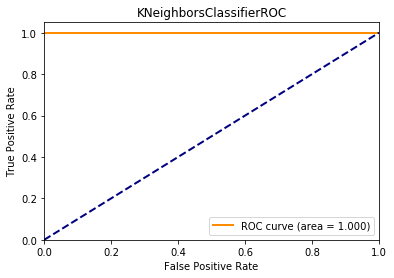

,predicted poison,predicted edible
poison,1181,0
edible,0,1257


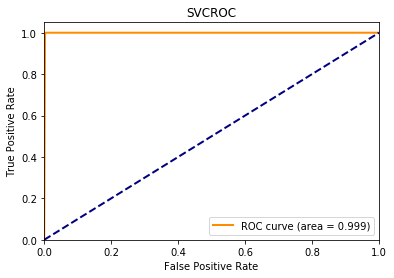

,predicted poison,predicted edible
poison,1178,3
edible,0,1257


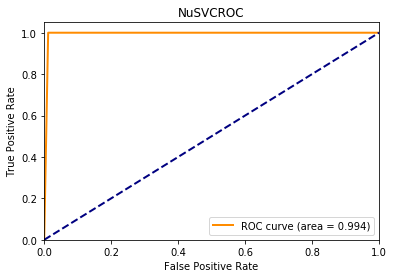

,predicted poison,predicted edible
poison,1167,14
edible,0,1257


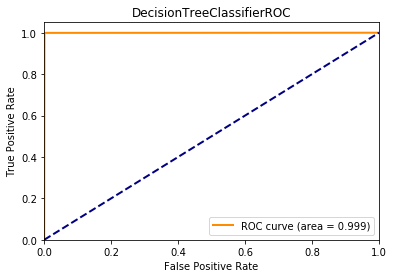

,predicted poison,predicted edible
poison,1180,1
edible,1,1256


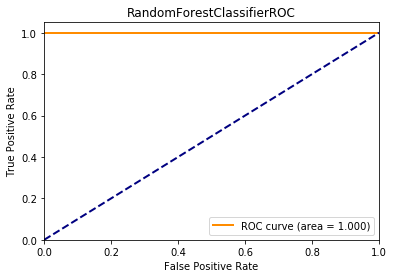

,predicted poison,predicted edible
poison,1181,0
edible,0,1257


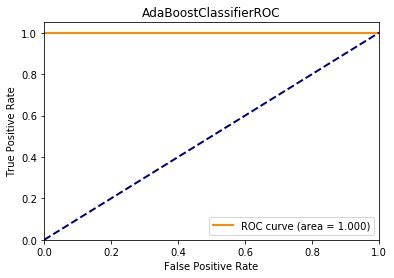

,predicted poison,predicted edible
poison,1181,0
edible,0,1257


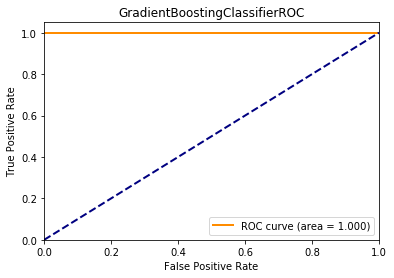

,predicted poison,predicted edible
poison,1181,0
edible,0,1257


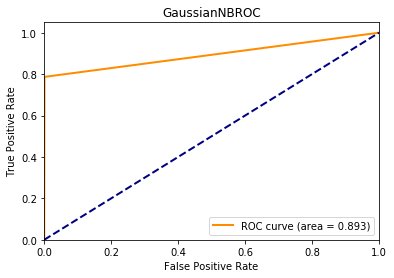

,predicted poison,predicted edible
poison,1180,1
edible,268,989


In [18]:
#print out all results
import sklearn 

def return_labels(x):
    if x == 1:
        return 'edible'
    else:
        return 'poison'

def styler(val):
    if val == 0:
        return 'color: red'
    else:
        return 'color: black; background-color: rgba(124,252,0,0.5); font-weight: bold'

for key, value in predicted_series.items():
    
    display(HTML('<h3>'+key+' ROC Curve</h3>'))
    
    #print out ROC
    get_roc_curve(y_test,value,title=key)
    
    #log-loss
    display(HTML('<p>log-loss: '+str(round(metrics.log_loss(y_test,value),5))+'</p>'))
    
    #accuracy
    display(HTML('<p>accuracy: '+str(int(metrics.accuracy_score(y_test,value)*100))+'%</p>'))
    
    #print out confusion matrix
    new_df = pd.DataFrame(sklearn.metrics.confusion_matrix(y_test,value))
    
    #change column and index names
    new_df = new_df.rename(index=str, columns={1: "predicted edible", 0: "predicted poison"})
    new_df = new_df.rename({'0': "poison", '1': "edible"}, axis='index')
    
    #print out the results
    display(HTML('<h3>'+key+' Confusion Matrix</h3>'))
    display(new_df.style.applymap(styler))
    print("\n")

#print AUC
#print confusion matrix

## Final Remarks <a id="final"></a>

Above, we see that nearly all of the models made perfect predictions except for the Gaussian Naive Bayes model, but even that model only predicted 1 false positive.  This is not a typical result--most models have curved ROC lines and have more false positives and false negatives when they make predictions.  Luckily, our mushroom data is looking very very predictive.  Scikit really <i>is</i> a powerful-and-easy library for building great classifiers.

Typically, in other prediction tasks, one of the above models will perform better than others.  Perhaps a certain model just tends to fit a certain input space better, or perhaps certain algorithms perform better with certain variable types, but you will hardly ever see an AUC (area under [ROC] curve) of 1 like we see exhibited above.  Some classes of models tend to have higher variance, others have higher bias, and this tradeof is primarily what determines which algorithms perform better on which data.

A final note: our data was only categorical above, in many scenarios this will not be the case, attributes in our data might be numeric or unstructured.  In many of these different scenarios, much more data cleaning and feature extraction might be involved, to say nothing of other techniques I might have utilized such as dimensionality reduction, feature selection, or feature engineering--most of the work is getting the data ready for the algorithms to ingest.